**Resumen**

Este estudio analiza un conjunto de datos detallados sobre vuelos, que incluye información sobre fechas de salida, clasificación de vuelos (cabotaje o internacional), aerolíneas, aeropuertos, localidades de origen y destino, y la cantidad de pasajeros y asientos disponibles por vuelo. El análisis permite identificar patrones de tráfico aéreo a nivel anual, la cantidad de pasajeros, la capacidad de los vuelos y la conectividad entre distintos puntos de Argentina y el resto del mundo. Se busca evaluar la frecuencia de vuelos por aeropuerto, la popularidad de diferentes destinos, y la clasificación de vuelos más utilizada.

**Contexto Comercial**

En el contexto de una aerolínea argentina que busca optimizar su red de vuelos y aumentar la eficiencia operativa, entender los patrones de tráfico aéreo y la distribución de pasajeros por rutas nacionales e internacionales es esencial. La empresa, con un enfoque en la mejora de la conectividad y la expansión de su red, busca maximizar la utilización de sus aeropuertos y recursos. Este análisis de datos contribuirá a la toma de decisiones estratégicas, como la asignación de vuelos a destinos más demandados, la evaluación de la capacidad de los aeropuertos, y la identificación de oportunidades para ampliar la oferta en mercados internacionales clave.

*Hipotesis*

Los vuelos con mayor número de asientos tienen una mayor ocupación de pasajeros.

Las aerolíneas más grandes tienen un mayor número de vuelos nacionales e internacionales.

El número de pasajeros por vuelo varía significativamente entre diferentes destinos.

La cantidad de vuelos internacionales es significativamente menor que la de vuelos nacionales.

Los aeropuertos más grandes tienen una mayor cantidad de vuelos y pasajeros.

**Conlcusion**

Se observó que las variables categóricas, como 'clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais', 'destino_pais', entre otras, tienen una distribución desigual. Algunos países de origen, como Argentina, dominan considerablemente las categorías, mientras que otras como ciertos destinos presentan una frecuencia muy baja, lo que podría estar relacionado con la cantidad limitada de vuelos en esos países.

El análisis visual mediante un diagrama de dispersión mostró una relación positiva entre el número de asientos y el número de pasajeros. Esto sugiere que, en general, los vuelos con más asientos tienden a transportar más pasajeros. Sin embargo, la dispersión de algunos puntos podría indicar vuelos con baja ocupación o con características especiales.

Al realizar un boxplot de los pasajeros, se evidenció la presencia de algunos valores atípicos (outliers), lo que indica vuelos con un número de pasajeros considerablemente mayor o menor al resto.

En cuanto a la frecuencia de las categorías, se observó que algunas aerolíneas y destinos aparecen con más frecuencia que otros, como lo es la Ciudad Autonoma de Buenos Aires.

La visualización con gráficos como el countplot y el boxplot proporcionó información valiosa sobre la distribución de los vuelos y la variabilidad de los pasajeros y asientos. El uso de etiquetas verticales mejoró la legibilidad de los datos cuando las categorías eran largas o numerosas.



In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from google.colab import files
from google.colab import drive
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [178]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
df = pd.read_excel("/content/drive/MyDrive/Colab/dbvuelos.xlsx")
df.shape

(15249, 20)

In [180]:
file_path="/content/drive/MyDrive/Colab/dbvuelos.xlsx"

df = pd.read_excel(file_path)

df.head()

,indice_tiempo,clasificacion_vuelo,clase_vuelo,aerolinea,origen_oaci,origen_aeropuerto,origen_localidad,origen_provincia,origen_pais,origen_continente,destino_oaci,destino_aeropuerto,destino_localidad,destino_provincia,destino_pais,destino_continente,pasajeros,asientos,vuelos,Unnamed: 19
0,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SAVV,Gobernador Castello,Viedma,Río Negro,Argentina,América del Sur,14,96,1,NaN
1,2017-01-01,Cabotaje,Regular,LATAM,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,SACO,Aeropuerto Int. Ingeniero Ambrosio Taravella,Córdoba,Córdoba,Argentina,América del Sur,375,504,3,NaN
2,2017-01-02,Cabotaje,Regular,LATAM,SAZN,Aeropuerto Int. Presidente Perón,Neuquén,Neuquén,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,427,504,3,NaN
3,2017-01-02,Cabotaje,Regular,LATAM,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,465,672,4,NaN
4,2017-01-03,Cabotaje,Regular,LATAM,SAZN,Aeropuerto Int. Presidente Perón,Neuquén,Neuquén,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,318,336,2,NaN


In [181]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15249 entries, 0 to 15248
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   indice_tiempo        15249 non-null  datetime64[ns]
 1   clasificacion_vuelo  15249 non-null  object        
 2   clase_vuelo          15249 non-null  object        
 3   aerolinea            15249 non-null  object        
 4   origen_oaci          15248 non-null  object        
 5   origen_aeropuerto    15249 non-null  object        
 6   origen_localidad     15249 non-null  object        
 7   origen_provincia     15249 non-null  object        
 8   origen_pais          15249 non-null  object        
 9   origen_continente    15249 non-null  object        
 10  destino_oaci         15249 non-null  object        
 11  destino_aeropuerto   15249 non-null  object        
 12  destino_localidad    15249 non-null  object        
 13  destino_provincia    15249 non-

,indice_tiempo,clasificacion_vuelo,clase_vuelo,aerolinea,origen_oaci,origen_aeropuerto,origen_localidad,origen_provincia,origen_pais,origen_continente,destino_oaci,destino_aeropuerto,destino_localidad,destino_provincia,destino_pais,destino_continente,pasajeros,asientos,vuelos,Unnamed: 19
0,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SAVV,Gobernador Castello,Viedma,Río Negro,Argentina,América del Sur,14,96,1,NaN
1,2017-01-01,Cabotaje,Regular,LATAM,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,SACO,Aeropuerto Int. Ingeniero Ambrosio Taravella,Córdoba,Córdoba,Argentina,América del Sur,375,504,3,NaN
2,2017-01-02,Cabotaje,Regular,LATAM,SAZN,Aeropuerto Int. Presidente Perón,Neuquén,Neuquén,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,427,504,3,NaN
3,2017-01-02,Cabotaje,Regular,LATAM,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,465,672,4,NaN
4,2017-01-03,Cabotaje,Regular,LATAM,SAZN,Aeropuerto Int. Presidente Perón,Neuquén,Neuquén,Argentina,América del Sur,SABE,Aeroparque Jorge Newbery,Ciudad de Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,América del Sur,318,336,2,NaN


Descripción de las Variables

**indice_tiempo:** Fechas o periodos en los que se registraron los vuelos.

**clasificacion_vuelo:** Categoría del vuelo (por ejemplo, cabotaje o internacional).

**clase_vuelo:** Tipo de clase de los pasajeros (e.g., económica, ejecutiva).

**aerolinea:** La aerolínea que opera el vuelo.

**origen_oaci, destino_oaci:** Códigos de la OACI para los aeropuertos de origen y destino.

**origen_localidad, destino_localidad:** Localidades de origen y destino.

**pasajeros:** Número de pasajeros en cada vuelo.

**asientos:** Número de asientos disponibles.

**vuelos:** Número de vuelos operados.

In [182]:
print(df.isnull().sum())

indice_tiempo              0
clasificacion_vuelo        0
clase_vuelo                0
aerolinea                  0
origen_oaci                1
origen_aeropuerto          0
origen_localidad           0
origen_provincia           0
origen_pais                0
origen_continente          0
destino_oaci               0
destino_aeropuerto         0
destino_localidad          0
destino_provincia          0
destino_pais              27
destino_continente         0
pasajeros                  0
asientos                   0
vuelos                     0
Unnamed: 19            15237
dtype: int64


In [183]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [184]:
X = df[['clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais', 'origen_continente', 'destino_pais', 'destino_continente', 'asientos', 'vuelos']]

y = df['vuelos']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais', 'origen_continente', 'destino_pais', 'destino_continente']])
X_test_encoded = encoder.transform(X_test[['clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais', 'origen_continente', 'destino_pais', 'destino_continente']])


X_train_final = pd.concat(
    [pd.DataFrame(X_train_encoded), X_train[['asientos', 'vuelos']].reset_index(drop=True)], axis=1
)
X_test_final = pd.concat(
    [pd.DataFrame(X_test_encoded), X_test[['asientos', 'vuelos']].reset_index(drop=True)], axis=1
)

In [187]:
categorical_features = ['clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais', 'origen_continente', 'destino_pais', 'destino_continente']
numerical_features = ['asientos', 'vuelos']

In [188]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])

In [189]:
X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')

<ipython-input-189-9a001626ccdd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')
<ipython-input-189-9a001626ccdd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


In [190]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

Columnas numéricas: Index(['vuelos'], dtype='object')
Columnas categóricas: Index(['clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_pais',
       'origen_continente', 'destino_pais', 'destino_continente', 'asientos'],
      dtype='object')


In [191]:
for col in categorical_features:
  print(f"Column: {col}, Unique types: {df[col].apply(type).unique()}")

Column: clasificacion_vuelo, Unique types: [<class 'str'>]
Column: clase_vuelo, Unique types: [<class 'str'>]
Column: aerolinea, Unique types: [<class 'str'>]
Column: origen_pais, Unique types: [<class 'str'>]
Column: origen_continente, Unique types: [<class 'str'>]
Column: destino_pais, Unique types: [<class 'str'> <class 'float'>]
Column: destino_continente, Unique types: [<class 'str'>]


In [192]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [193]:
for col in categorical_features:
  X_train[col] = X_train[col].astype(str)
  X_test[col] = X_test[col].astype(str)

In [194]:
for col in cat_cols:
    print(f"Columna '{col}': {X_train[col].unique()}")

Columna 'clasificacion_vuelo': ['Cabotaje' 'Internacional']
Columna 'clase_vuelo': ['Regular' 'No Regular']
Columna 'aerolinea': ['Flybondi' 'Aerolíneas Argentinas' 'Andes Líneas Aéreas'
 'JetSMART Airlines' 'Flyest' 'LADE - Líneas Aéreas Del Estado' 'LATAM'
 'Avianca' 'United Airlines' 'Norwegian Air Shuttle'
 'Boliviana de Aviación' 'Aerovías DAP' 'ASL Airlines France' 'KLM'
 'American Airlines' 'LASA' 'Lufthansa' 'Copa Airlines' 'Delta Air Lines'
 'Gol Transportes Aéreos' 'Aeroméxico' 'Air Europa']
Columna 'origen_pais': ['Argentina' ' Argentina']
Columna 'origen_continente': ['América del Sur' 'Argentina']
Columna 'destino_pais': ['Argentina' ' Argentina' 'Buenos Aires' 'Ciudad Autónoma de Buenos Aires'
 'Santa Cruz' 'Chile' 'Córdoba' 'Chubut' 'Tierra del Fuego']
Columna 'destino_continente': ['América del Sur' 'Argentina' 'Chile' ' Argentina' 'Brasil']
Columna 'asientos': [189 192 144 48 298 96 834 165 266 351 16 760 170 25 372 186 473 4 5 378
 146 141 128 680 340 1275 19 362 149 

In [195]:
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [196]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [197]:
X_train[cat_cols] = X_train[cat_cols].fillna("missing")
X_test[cat_cols] = X_test[cat_cols].fillna("missing")

In [198]:
modelo.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=10)

In [199]:
preds_train = modelo.predict(X_train_transformed)
preds_test = modelo.predict(X_test_transformed)

In [200]:
print("Accuracy en entrenamiento:", accuracy_score(y_train, preds_train))
print("Accuracy en prueba:", accuracy_score(y_test, preds_test))

Accuracy en entrenamiento: 0.979342569063038
Accuracy en prueba: 0.980983606557377


In [201]:
cm = confusion_matrix(y_test, preds_test)

In [202]:
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[1790    0    1 ...    0    0    0]
 [   3  543    1 ...    0    0    0]
 [   1    0  225 ...    0    0    0]
 ...
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    1    0]]


In [203]:
print("Reporte de clasificación:")
print(classification_report(y_test, preds_test))

Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1791
           2       1.00      0.99      1.00       547
           3       0.97      0.99      0.98       227
           4       0.97      0.94      0.96       115
           5       1.00      0.97      0.99        72
           6       0.96      0.98      0.97        44
           7       1.00      1.00      1.00        18
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00        17
          10       0.67      0.67      0.67         3
          12       0.00      0.00      0.00         1
          19       0.83      1.00      0.91        15
          20       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          48       1.00      0.50      0.67         2
          85       0.77      0.94      0.85        18
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

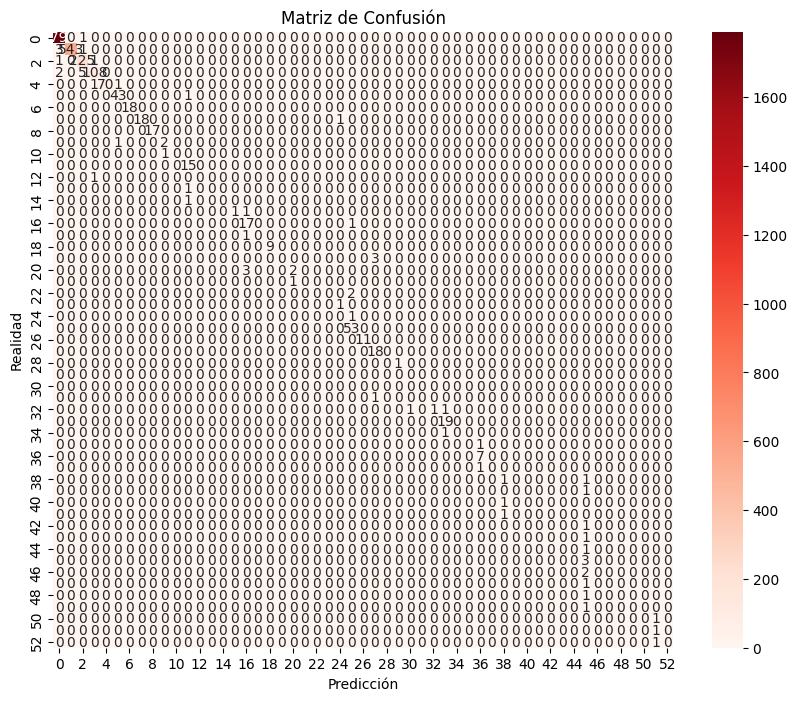

In [204]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, preds_test), annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [205]:
numeric_df = df.select_dtypes(include=np.number)

In [206]:
corr = numeric_df.corr()

In [132]:
df['asientos'] = pd.to_numeric(df['asientos'], errors='coerce')
df['pasajeros'] = pd.to_numeric(df['pasajeros'], errors='coerce')

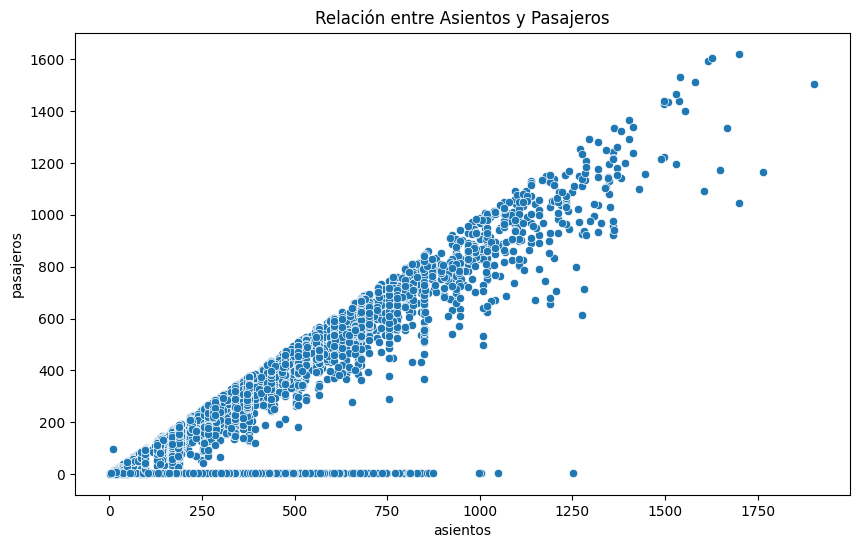

In [133]:
df = df.dropna(subset=['asientos', 'pasajeros'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='asientos', y='pasajeros', data=df)
plt.title('Relación entre Asientos y Pasajeros')
plt.show()

In [218]:
df['pasajeros'] = pd.to_numeric(df['pasajeros'], errors='coerce')

In [219]:
df = df.dropna(subset=['pasajeros'])

In [220]:
Q1 = df['pasajeros'].quantile(0.25)
Q3 = df['pasajeros'].quantile(0.75)
IQR = Q3 - Q1

In [221]:
df_sin_outliers = df[(df['pasajeros'] >= limite_inferior) & (df['pasajeros'] <= limite_superior)]

In [224]:
print(df_sin_outliers)

      indice_tiempo clasificacion_vuelo clase_vuelo              aerolinea  \
0        2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
1        2017-01-01            Cabotaje     Regular                  LATAM   
2        2017-01-02            Cabotaje     Regular                  LATAM   
3        2017-01-02            Cabotaje     Regular                  LATAM   
4        2017-01-03            Cabotaje     Regular                  LATAM   
...             ...                 ...         ...                    ...   
15244    2024-09-28            Cabotaje     Regular      JetSMART Airlines   
15245    2024-09-29            Cabotaje  No Regular    Andes Líneas Aéreas   
15246    2024-09-29            Cabotaje  No Regular    Andes Líneas Aéreas   
15247    2024-09-30            Cabotaje  No Regular    Andes Líneas Aéreas   
15248    2024-09-30            Cabotaje  No Regular    Andes Líneas Aéreas   

      origen_oaci                                  origen_aerop

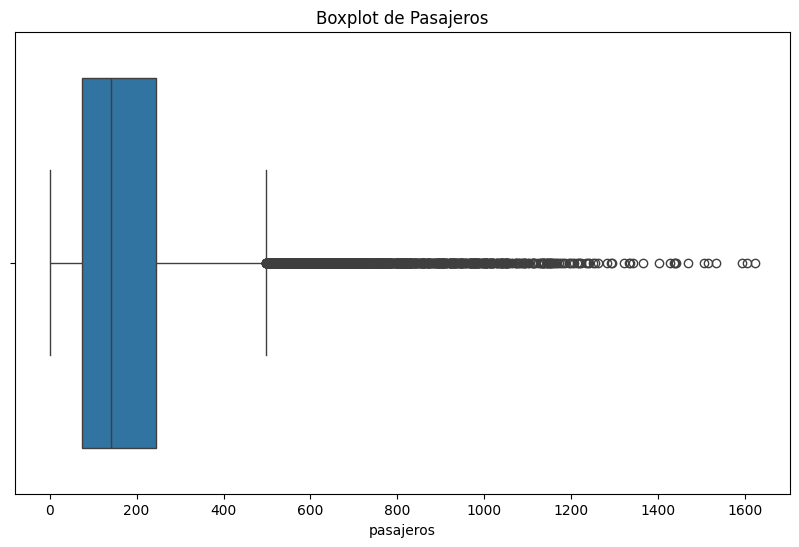

In [225]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pasajeros'])
plt.title('Boxplot de Pasajeros')
plt.show()

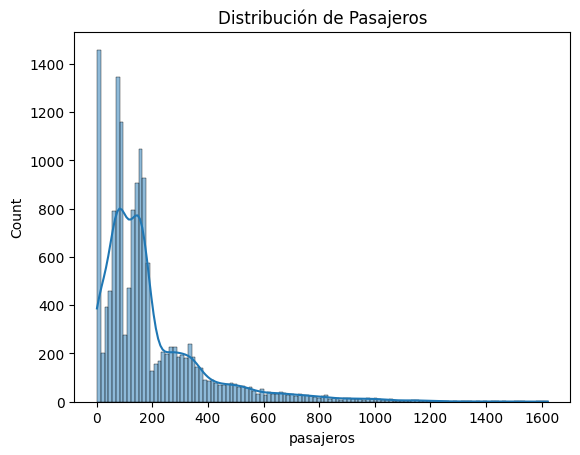

In [228]:
sns.histplot(df['pasajeros'], kde=True)
plt.title('Distribución de Pasajeros')
plt.show()


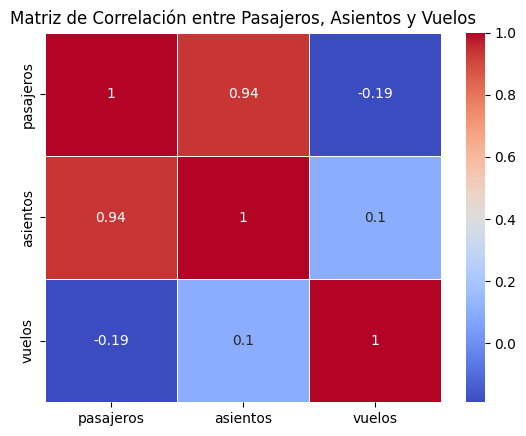

In [229]:
corr = df[['pasajeros', 'asientos', 'vuelos']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Pasajeros, Asientos y Vuelos')
plt.show()

<ipython-input-230-4abfdce06057>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


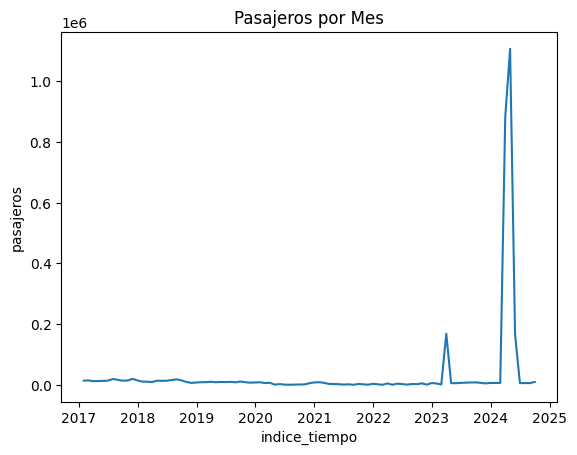

In [230]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])
df.set_index('indice_tiempo', inplace=True)


monthly_data = df.resample('M').sum()
sns.lineplot(data=monthly_data, x='indice_tiempo', y='pasajeros')
plt.title('Pasajeros por Mes')
plt.show()

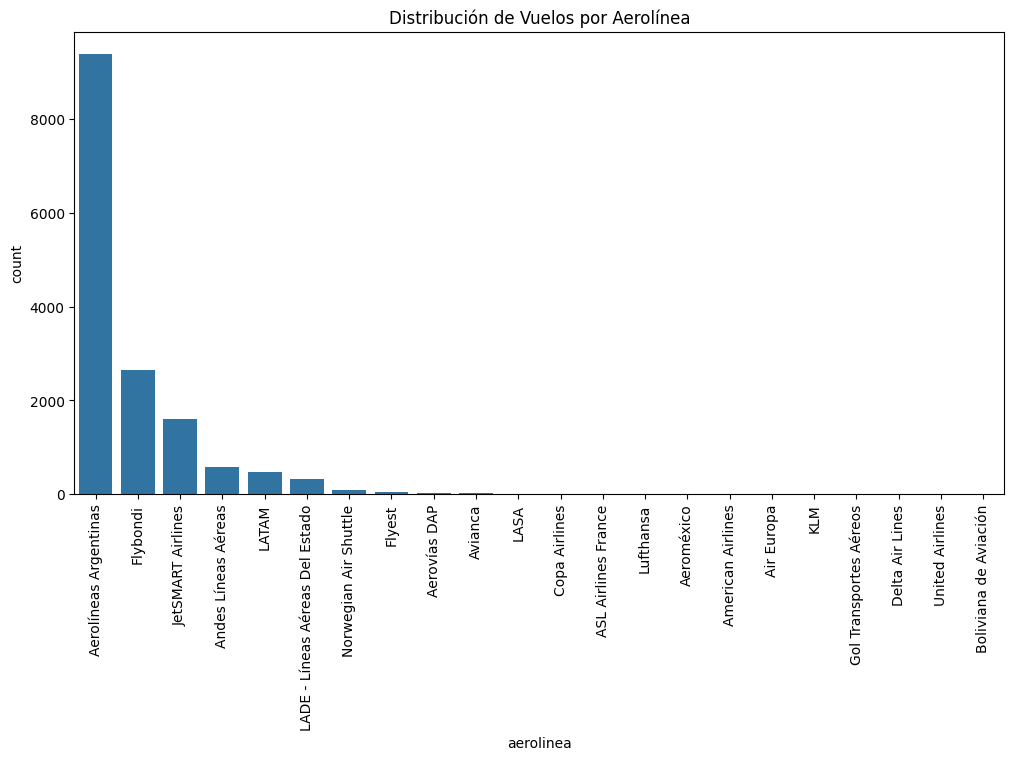

In [232]:
plt.figure(figsize=(12, 6))
sns.countplot(x='aerolinea', data=df, order=df['aerolinea'].value_counts().index)
plt.title('Distribución de Vuelos por Aerolínea')
plt.xticks(rotation=90)
plt.show()

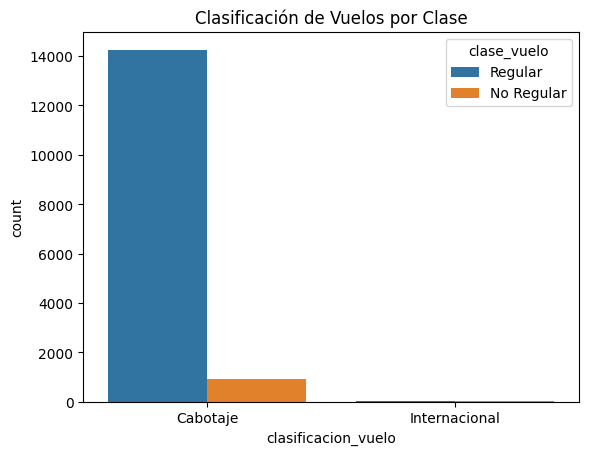

In [233]:
sns.countplot(x='clasificacion_vuelo', hue='clase_vuelo', data=df)
plt.title('Clasificación de Vuelos por Clase')
plt.show()

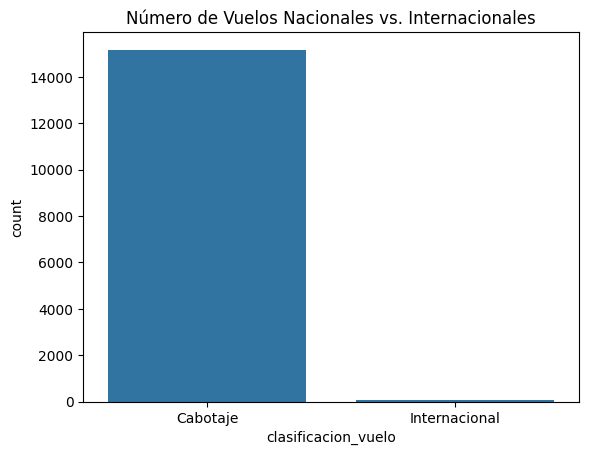

In [234]:
sns.countplot(x='clasificacion_vuelo', data=df)
plt.title('Número de Vuelos Nacionales vs. Internacionales')
plt.show()

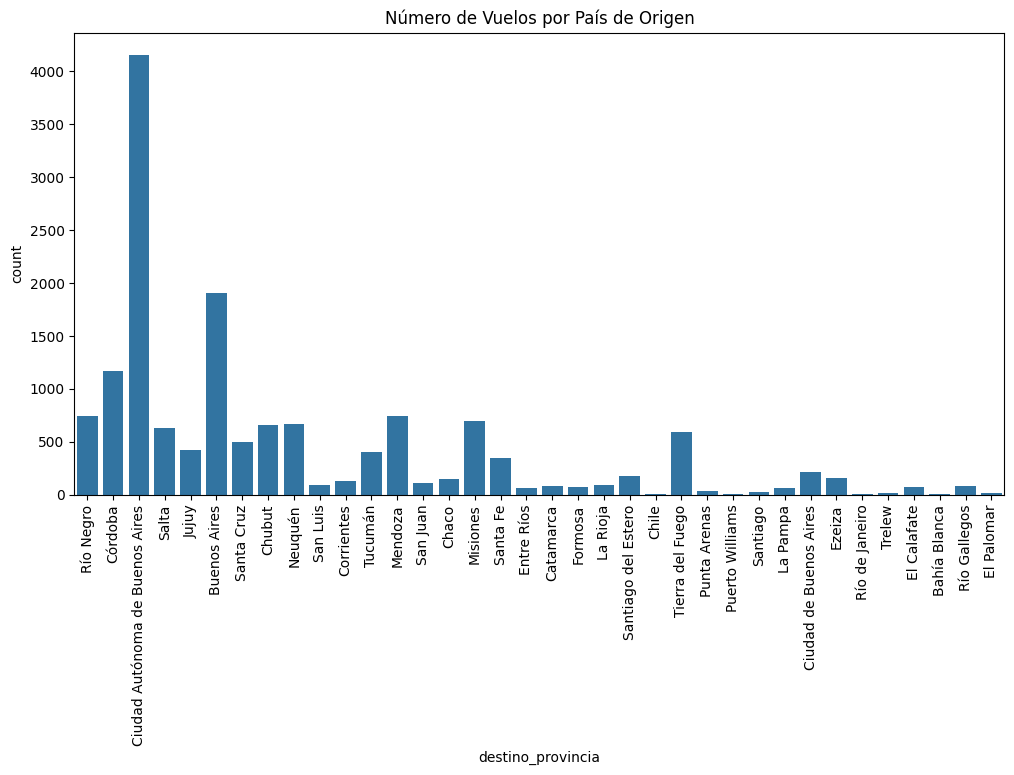

In [248]:
plt.figure(figsize=(12, 6))
sns.countplot(x='destino_provincia', data=df)
plt.title('Número de Vuelos por País de Origen')
plt.xticks(rotation=90)
plt.show()

In [226]:
precision_micro = metrics.precision_score(y_test, preds, average='micro')
precision_macro = metrics.precision_score(y_test, preds, average='macro')
precision_weighted = metrics.precision_score(y_test, preds, average='weighted')

print(f"Precision (micro): {precision_micro}")
print(f"Precision (macro): {precision_macro}")
print(f"Precision (weighted): {precision_weighted}")

Precision (micro): 0.980983606557377
Precision (macro): 0.3804224765368295
Precision (weighted): 0.976125091555018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [142]:
precision_clase = metrics.precision_score(y_test, preds, labels=[1], average=None)
print(f"Precision para la clase positiva: {precision_clase}")

Precision para la clase positiva: [0.99665924]


In [143]:
print(f"Clases únicas en y_test: {set(y_test)}")

Clases únicas en y_test: {128, 1, 2, 3, 4, 5, 6, 7, 8, 9, 638, 10, 12, 529, 19, 20, 149, 284, 668, 669, 33, 162, 37, 935, 168, 680, 170, 298, 808, 48, 817, 186, 189, 850, 595, 340, 85, 978, 87, 860, 93, 221, 605, 96, 95, 609, 477, 612, 372, 765, 510}


In [147]:
print("Clases únicas:", set(y_test))


precision_micro = precision_score(y_test, preds, average='micro')
precision_macro = precision_score(y_test, preds, average='macro')
precision_weighted = precision_score(y_test, preds, average='weighted')

print(f"Precision Micro: {precision_micro}")
print(f"Precision Macro: {precision_macro}")
print(f"Precision Weighted: {precision_weighted}")

Clases únicas: {128, 1, 2, 3, 4, 5, 6, 7, 8, 9, 638, 10, 12, 529, 19, 20, 149, 284, 668, 669, 33, 162, 37, 935, 168, 680, 170, 298, 808, 48, 817, 186, 189, 850, 595, 340, 85, 978, 87, 860, 93, 221, 605, 96, 95, 609, 477, 612, 372, 765, 510}
Precision Micro: 0.980983606557377
Precision Macro: 0.3804224765368295
Precision Weighted: 0.976125091555018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [151]:
recall_micro = recall_score(y_test, preds, average='micro')
recall_macro = recall_score(y_test, preds, average='macro')
recall_weighted = recall_score(y_test, preds, average='weighted')

print(f"Recall (micro): {recall_micro}")
print(f"Recall (macro): {recall_macro}")
print(f"Recall (weighted): {recall_weighted}")

Recall (micro): 0.980983606557377
Recall (macro): 0.39931616444407164
Recall (weighted): 0.980983606557377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
recall_clase_1 = recall_score(y_test, preds, labels=[1], average=None)
recall_clase_0 = recall_score(y_test, preds, labels=[0], average=None)

print(f"Recall para la clase 1: {recall_clase_1}")
print(f"Recall para la clase 0: {recall_clase_0}")

Recall para la clase 1: [0.99944165]
Recall para la clase 0: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
print(f"Clases únicas en y_test: {set(y_test)}")
print(f"Clases únicas en preds: {set(preds)}")

Clases únicas en y_test: {128, 1, 2, 3, 4, 5, 6, 7, 8, 9, 638, 10, 12, 529, 19, 20, 149, 284, 668, 669, 33, 162, 37, 935, 168, 680, 170, 298, 808, 48, 817, 186, 189, 850, 595, 340, 85, 978, 87, 860, 93, 221, 605, 96, 95, 609, 477, 612, 372, 765, 510}
Clases únicas en preds: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 272, 19, 935, 680, 168, 170, 298, 48, 186, 189, 595, 340, 85, 93, 96, 510, 255}


In [154]:
print("Clases únicas en y_test:", set(y_test))
print("Clases únicas en preds:", set(preds))

Clases únicas en y_test: {128, 1, 2, 3, 4, 5, 6, 7, 8, 9, 638, 10, 12, 529, 19, 20, 149, 284, 668, 669, 33, 162, 37, 935, 168, 680, 170, 298, 808, 48, 817, 186, 189, 850, 595, 340, 85, 978, 87, 860, 93, 221, 605, 96, 95, 609, 477, 612, 372, 765, 510}
Clases únicas en preds: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 272, 19, 935, 680, 168, 170, 298, 48, 186, 189, 595, 340, 85, 93, 96, 510, 255}


In [155]:
recall_micro = recall_score(y_test, preds, average='micro')
recall_macro = recall_score(y_test, preds, average='macro')
recall_weighted = recall_score(y_test, preds, average='weighted')

print(f"Recall Micro: {recall_micro}")
print(f"Recall Macro: {recall_macro}")
print(f"Recall Weighted: {recall_weighted}")

Recall Micro: 0.980983606557377
Recall Macro: 0.39931616444407164
Recall Weighted: 0.980983606557377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [157]:
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1791
           2       1.00      0.99      1.00       547
           3       0.97      0.99      0.98       227
           4       0.97      0.94      0.96       115
           5       1.00      0.97      0.99        72
           6       0.96      0.98      0.97        44
           7       1.00      1.00      1.00        18
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00        17
          10       0.67      0.67      0.67         3
          12       0.00      0.00      0.00         1
          19       0.83      1.00      0.91        15
          20       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          48       1.00      0.50      0.67         2
          85       0.77      0.94      0.85        18
          87       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [158]:
accuracy = metrics.accuracy_score(y_train, preds_train)
accuracy

0.979342569063038

In [160]:
f1_positivo = metrics.f1_score(y_train, preds_train, average='weighted')
f1_negativo = metrics.f1_score(y_train, preds_train, average='weighted')

In [162]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6995
           2       1.00      0.99      1.00      2106
           3       0.98      0.99      0.99       993
           4       0.98      0.97      0.98       452
           5       0.99      0.98      0.98       286
           6       0.90      0.98      0.94       176
           7       0.96      0.93      0.94       116
           8       0.98      0.93      0.95        95
           9       1.00      0.94      0.97        53
          10       0.77      0.57      0.65        30
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          19       0.75      0.98      0.85        49
          20       0.00      0.00      0.00         4
          21       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [163]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1791
           2       1.00      0.99      1.00       547
           3       0.97      0.99      0.98       227
           4       0.97      0.94      0.96       115
           5       1.00      0.97      0.99        72
           6       0.96      0.98      0.97        44
           7       1.00      1.00      1.00        18
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00        17
          10       0.67      0.67      0.67         3
          12       0.00      0.00      0.00         1
          19       0.83      1.00      0.91        15
          20       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          48       1.00      0.50      0.67         2
          85       0.77      0.94      0.85        18
          87       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_